In [1]:
import tensorflow as tf
import jax.numpy as jnp
import jax
import numpy as np

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

batch_size = 32
learning_rate = 10e-4

# loading the dataset
ds_tr, ds_ts, ds_val = tfds.load('oxford_flowers102', split=['train', 'test', 'validation'], shuffle_files=True)

# browsing dataset
print(ds_tr.element_spec)

# set the information of dataset
ds_tr = ds_tr.prefetch(tf.data.AUTOTUNE)
ds_tr = ds_tr.shuffle(32, reshuffle_each_iteration=True)
# "batch"只能疊shape一樣的tensor。所以統一shape的map function要先做
ds_tr = ds_tr.map(lambda x: tf.image.resize_with_crop_or_pad(x['image'], 256, 256)) 
ds_tr = ds_tr.batch(32, True) 

# make the iterator
ds_tr_iter = iter(ds_tr)

ds_tr_ele = ds_tr_iter.get_next()
print(ds_tr_ele.shape)


2023-05-10 15:16:15.730460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 15:16:22.523452: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2023-05-10 15:16:22.534143: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.0: cannot open shared object file: No such file or directory
2023-05-10 15:16:22.534188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use

{'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(32, 256, 256, 3)


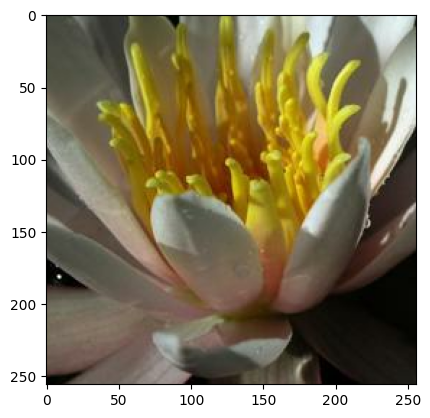

In [2]:
# showing the image
plt.imshow(ds_tr_ele[0].numpy().astype("uint8"))

In [3]:
## test the embedding and reverse the embedding
img = ds_tr_ele[0].numpy().astype("float32")
img = (img - 128.) / 256.

a = tf.random.uniform(img.shape, -1, 1)
b = tf.random.uniform(img.shape, -1, 1)

# embedding
img_em = img * a + b
img_rem = (img_em - b) / a
print(img[0])
print(img_em[0])
print(img_rem[0])

[[-0.23828125 -0.21484375 -0.26171875]
 [-0.23828125 -0.21484375 -0.26171875]
 [-0.234375   -0.2109375  -0.2578125 ]
 [-0.234375   -0.2109375  -0.2578125 ]
 [-0.23046875 -0.20703125 -0.25390625]
 [-0.23046875 -0.20703125 -0.25390625]
 [-0.2265625  -0.203125   -0.25      ]
 [-0.22265625 -0.19921875 -0.24609375]
 [-0.22265625 -0.19921875 -0.24609375]
 [-0.21875    -0.1953125  -0.2421875 ]
 [-0.21875    -0.1953125  -0.2421875 ]
 [-0.21484375 -0.19140625 -0.23828125]
 [-0.21484375 -0.19140625 -0.23828125]
 [-0.21484375 -0.19140625 -0.23828125]
 [-0.22265625 -0.19921875 -0.24609375]
 [-0.22265625 -0.19921875 -0.24609375]
 [-0.1875     -0.1640625  -0.2109375 ]
 [-0.1015625  -0.078125   -0.1171875 ]
 [-0.015625    0.0078125  -0.03125   ]
 [ 0.0234375   0.04296875  0.015625  ]
 [ 0.0078125   0.02734375  0.        ]
 [-0.02734375 -0.0078125  -0.03515625]
 [-0.05859375 -0.0390625  -0.06640625]
 [-0.0703125  -0.05078125 -0.078125  ]
 [-0.078125   -0.05859375 -0.0859375 ]
 [-0.109375   -0.08984375

In [13]:
def nn():
    input = tf.keras.layers.Input(shape=[224, 224, 3])
    x1 = tf.keras.layers.Conv2D(64, (3,3), (1,1), "same")(input)
    x2 = tf.keras.layers.Conv2D(128, (3,3), (1,1), "same")(x1)
    x3 = tf.keras.layers.Conv2D(128, (3,3), (1,1), "same")(x2)
    out = tf.keras.layers.Conv2D(128, (3,3), (1,1), "same")(x3)

    return tf.keras.Model(inputs=input, outputs=out, name='dd')

model = nn()
l2o = model.layers[1].output
some_layer_out = tf.keras.Model(inputs=model.input, outputs=l2o)
model(np.ones([1,224,224,3]))
# some_layer_out(np.ones([1,224,224,3]))


<tf.Tensor: shape=(1, 224, 224, 128), dtype=float32, numpy=
array([[[[ 0.18258677,  0.09871949,  0.07002355, ...,  0.10577895,
          -0.01956278,  0.07468699],
         [ 0.1345977 , -0.07342318,  0.04930153, ...,  0.14376065,
           0.0618111 ,  0.20215268],
         [ 0.23382375, -0.10876893,  0.00694243, ...,  0.03893358,
           0.08078563,  0.14417289],
         ...,
         [ 0.19742405, -0.11773862,  0.01837601, ..., -0.05032255,
           0.04456474,  0.14346397],
         [ 0.03838003, -0.14380875, -0.00511659, ..., -0.11351234,
           0.10757729,  0.23181975],
         [-0.03244325, -0.23289102, -0.06642835, ..., -0.02077188,
           0.03988165, -0.04072464]],

        [[ 0.16083795,  0.07650788,  0.06620902, ...,  0.13869794,
          -0.08791889, -0.00560059],
         [ 0.20926893, -0.15100735,  0.0800116 , ...,  0.25251272,
           0.06245308,  0.10656717],
         [ 0.30561224, -0.11693774,  0.03855853, ...,  0.02262976,
           0.10161392,  0